# Report: Neural Network Implementation and XOR Problem Solution

## 1. Overview
In this project, we implemented a neural network library from scratch as part of the assignment's Part 1 requirements. The objective was to build various components for a neural network, including layers, activation functions, a loss function, and a sequential architecture to solve the XOR problem. We also added features for saving and loading model weights.


In [407]:
class Layer:
    def __init__(self):
        """
        Initializes the Layer.
        This is a base class and will be extended by specific types of layers.
        """
        pass
    
    def forward(self, input_data):
        """
        Computes the forward pass of the layer.
        Parameters:
            input_data (np.array): The input data for the layer.
        Returns:
            The output after applying the layer's transformation.
        """
        raise NotImplementedError("The forward method must be implemented in subclasses.")
    
    def backward(self, output_gradient, learning_rate):
        """
        Computes the backward pass of the layer.
        Parameters:
            output_gradient (np.array): Gradient of the loss with respect to the output.
            learning_rate (float): The learning rate for parameter updates.
        Returns:
            Gradient of the loss with respect to the input.
        """
        raise NotImplementedError("The backward method must be implemented in subclasses.")


## 2. Neural Network Components
We developed the following key components for the neural network:

- **Layer Class**: A base class for all layers, defining the structure for forward and backward propagation methods.
- **Linear Layer**: A fully connected layer class inheriting from the base `Layer` class, implementing the linear transformation \( Y = XW + b \).
- **Activation Functions**:
  - **ReLU**: Outputs the input if positive; otherwise, zero.
  - **Sigmoid**: Outputs a value between 0 and 1, suitable for binary classification.
  - **Tanh**: Outputs values in the range \([-1, 1]\), adding non-linearity.
- **Sequential Class**: A container class to manage multiple layers, orchestrating forward and backward passes through the network. It also supports adding layers dynamically.


In [408]:
import numpy as np

class Linear(Layer):
    def __init__(self, input_dim, output_dim):
        """
        Initializes the Linear Layer.
        Parameters:
            input_dim (int): Number of input features (input dimension).
            output_dim (int): Number of output features (nodes in this layer).
        """
        # Initialize weights and biases with small random numbers
        self.weights = np.random.randn(input_dim, output_dim) * 0.01
        self.bias = np.zeros((1, output_dim))
        self.input = None  # Placeholder for input to be set during forward pass
        self.output = None  # Placeholder for output to be set during forward pass

    def forward(self, input_data):
        """
        Forward pass for the Linear Layer.
        Parameters:
            input_data (np.array): Input data of shape (batch_size, input_dim).
        Returns:
            np.array: Output of shape (batch_size, output_dim).
        """
        # Store input for use in backpropagation
        self.input = input_data
        
        # Compute the output as a linear transformation
        self.output = np.dot(self.input, self.weights) + self.bias
        
        return self.output

    def backward(self, output_gradient, learning_rate):
        # Clip gradients to avoid exploding gradients
        np.clip(output_gradient, -1, 1, out=output_gradient)

        # Compute the gradients
        weights_gradient = np.dot(self.input.T, output_gradient)
        input_gradient = np.dot(output_gradient, self.weights.T)

        # Update the weights and bias
        self.weights -= learning_rate * weights_gradient
        self.bias -= learning_rate * np.sum(output_gradient, axis=0, keepdims=True)

        # Return the gradient with respect to the input, to propagate to the previous layer
        return input_gradient



In [409]:
# Test the Linear layer implementation
if __name__ == "__main__":
    # Generate some random input data: batch of 5 samples with 4 features each
    input_data = np.random.randn(5, 4)  # Shape: (5, 4)
    
    # Instantiate a Linear layer: transforming 4 input features to 3 output features
    linear_layer = Linear(input_dim=4, output_dim=3)
    
    # Perform a forward pass
    output = linear_layer.forward(input_data)
    print("Output of the Linear Layer (Forward Pass):")
    print(output)
    print("\n")
    
    # Assume some gradient coming from the next layer (random for testing)
    output_gradient = np.random.randn(5, 3)  # Same shape as the output
    learning_rate = 0.01
    
    # Perform a backward pass
    input_gradient = linear_layer.backward(output_gradient, learning_rate)
    print("Gradient with respect to Input (Backward Pass):")
    print(input_gradient)
    print("\n")
    
    # Check updated weights and biases
    print("Updated Weights:")
    print(linear_layer.weights)
    print("\n")
    
    print("Updated Biases:")
    print(linear_layer.bias)


Output of the Linear Layer (Forward Pass):
[[-0.02914281 -0.01739775  0.03079883]
 [-0.01408818 -0.00458761  0.01435538]
 [ 0.00323871 -0.00511345  0.00057796]
 [ 0.0053071  -0.00398192 -0.00941065]
 [-0.00299851  0.0135079   0.00784477]]


Gradient with respect to Input (Backward Pass):
[[-0.01102546  0.02419836  0.00584778 -0.01168347]
 [-0.01165643  0.0250196   0.00620184 -0.01213264]
 [ 0.00439864  0.00317995 -0.00279106  0.00057801]
 [-0.00235452  0.01726222  0.00098262 -0.01572576]
 [ 0.00485983  0.00433713 -0.00308031 -0.00148242]]


Updated Weights:
[[-0.01666911  0.00799738 -0.00013016]
 [ 0.02678658  0.01518502 -0.02622508]
 [ 0.03329167  0.00653979 -0.01696135]
 [-0.01672909 -0.01781614  0.00983188]]


Updated Biases:
[[-0.04549487 -0.01852678 -0.00851976]]


## 3 Activation Functions

Activation functions introduce non-linearity into the neural network, allowing it to learn and represent more complex patterns beyond simple linear relationships. Below are the activation functions implemented in the neural network library:

### 1. ReLU (Rectified Linear Unit)
The **ReLU** function is one of the most commonly used activation functions in deep learning due to its simplicity and effectiveness.

- **Mathematical Definition**:
  \[
  f(x) = \max(0, x)
  \]
  

In [410]:
class ReLU(Layer):
    def __init__(self):
        """
        Initializes the ReLU Activation Layer.
        This layer applies the ReLU function element-wise.
        """
        self.input = None

    def forward(self, input_data):
        """
        Forward pass for ReLU.
        Parameters:
            input_data (np.array): Input data.
        Returns:
            np.array: Output after applying ReLU.
        """
        self.input = input_data
        return np.maximum(0, self.input)

    def backward(self, output_gradient, learning_rate):
        """
        Backward pass for ReLU.
        Parameters:
            output_gradient (np.array): Gradient of the loss with respect to the output.
            learning_rate (float): Not used in ReLU (no parameters to update).
        Returns:
            np.array: Gradient of the loss with respect to the input.
        """
        input_gradient = output_gradient * (self.input > 0)
        return input_gradient


### 2. Sigmoid
The **Sigmoid** function is a smooth and differentiable function that outputs values between 0 and 1, making it suitable for binary classification tasks.

- **Mathematical Definition**:
  \[
  f(x) = \frac{1}{1 + e^{-x}}
  \]

In [411]:
class Sigmoid(Layer):
    def __init__(self):
        """
        Initializes the Sigmoid Activation Layer.
        This layer applies the Sigmoid function element-wise.
        """
        self.output = None

    def forward(self, input_data):
        """
        Forward pass for Sigmoid.
        Parameters:
            input_data (np.array): Input data.
        Returns:
            np.array: Output after applying Sigmoid.
        """
        self.output = 1 / (1 + np.exp(-input_data))
        return self.output

    def backward(self, output_gradient, learning_rate):
        """
        Backward pass for Sigmoid.
        Parameters:
            output_gradient (np.array): Gradient of the loss with respect to the output.
            learning_rate (float): Not used in Sigmoid (no parameters to update).
        Returns:
            np.array: Gradient of the loss with respect to the input.
        """
        return output_gradient * (self.output * (1 - self.output))


In [412]:
# Test the ReLU Activation Layer
relu_layer = ReLU()
input_data = np.array([[-1, 2, -3], [4, -5, 6]])
relu_output = relu_layer.forward(input_data)
print("ReLU Output (Forward Pass):")
print(relu_output)

# Assume some gradient from the next layer (same shape as output)
relu_gradient = np.array([[1, 1, 1], [1, 1, 1]])
relu_backward = relu_layer.backward(relu_gradient, learning_rate=0.01)
print("ReLU Gradient (Backward Pass):")
print(relu_backward)
print("\n")

# Test the Sigmoid Activation Layer
sigmoid_layer = Sigmoid()
sigmoid_output = sigmoid_layer.forward(input_data)
print("Sigmoid Output (Forward Pass):")
print(sigmoid_output)

# Assume some gradient from the next layer (same shape as output)
sigmoid_gradient = np.array([[1, 1, 1], [1, 1, 1]])
sigmoid_backward = sigmoid_layer.backward(sigmoid_gradient, learning_rate=0.01)
print("Sigmoid Gradient (Backward Pass):")
print(sigmoid_backward)


ReLU Output (Forward Pass):
[[0 2 0]
 [4 0 6]]
ReLU Gradient (Backward Pass):
[[0 1 0]
 [1 0 1]]


Sigmoid Output (Forward Pass):
[[0.26894142 0.88079708 0.04742587]
 [0.98201379 0.00669285 0.99752738]]
Sigmoid Gradient (Backward Pass):
[[0.19661193 0.10499359 0.04517666]
 [0.01766271 0.00664806 0.00246651]]


## 4. Loss Function Implementation
We implemented the **Binary Cross-Entropy (BCE)** loss function, essential for binary classification tasks like XOR. The class includes:
- A forward method to compute the BCE loss.
- A backward method to compute the gradient necessary for backpropagation.


In [413]:
class BinaryCrossEntropy(Layer):
    def __init__(self):
        """
        Initializes the Binary Cross-Entropy Loss Layer.
        """
        self.y_true = None
        self.y_pred = None

    def forward(self, y_true, y_pred):
        """
        Forward pass to calculate the binary cross-entropy loss.
        Parameters:
            y_true (np.array): True labels (0 or 1).
            y_pred (np.array): Predicted probabilities (between 0 and 1).
        Returns:
            float: Binary cross-entropy loss value.
        """
        self.y_true = y_true
        self.y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)  # Avoid log(0) errors
        
        loss = -np.mean(self.y_true * np.log(self.y_pred) + (1 - self.y_true) * np.log(1 - self.y_pred))
        return loss

    def backward(self):
        """
        Backward pass to compute the gradient of the loss with respect to the output.
        Returns:
            np.array: Gradient of the loss with respect to the predictions.
        """
        return (self.y_pred - self.y_true) / (self.y_pred * (1 - self.y_pred) * self.y_true.size)


In [414]:
class Sequential(Layer):
    def __init__(self):
        """
        Initializes the Sequential container for the neural network layers.
        """
        self.layers = []

    def add(self, layer):
        """
        Adds a layer to the network.
        Parameters:
            layer (Layer): An instance of a layer to add to the network.
        """
        self.layers.append(layer)

    def forward(self, X):
        """
        Forward pass through all layers in the network.
        Parameters:
            X (np.array): Input data.
        Returns:
            np.array: Output after passing through all layers.
        """
        for layer in self.layers:
            X = layer.forward(X)
        return X

    def backward(self, loss_gradient, learning_rate):
        """
        Backward pass through all layers in reverse order.
        Parameters:
            loss_gradient (np.array): Gradient of the loss with respect to the output.
            learning_rate (float): Learning rate for parameter updates.
        """
        for layer in reversed(self.layers):
            loss_gradient = layer.backward(loss_gradient, learning_rate)

    # def save_weights(self, file_path):
    #             # Create a dictionary to store weights and biases with unique keys
    #     weights_dict = {}
    #     for idx, layer in enumerate(self.layers):
    #         if isinstance(layer, Linear):
    #             weights_dict[f'weights_{idx}'] = layer.weights
    #             weights_dict[f'bias_{idx}'] = layer.bias
        
    #     # Save the weights and biases using np.savez
    #     np.savez(file_path, **weights_dict)
    
    def save_weights(self, file_path):
        """
        Saves the weights and biases of the network to a file.
        Parameters:
            file_path (str): Path to the file where weights will be saved.
        """
        weights_dict = {}
        linear_layer_count = 0  # To keep track of Linear layers separately
        
        for layer in self.layers:
            if isinstance(layer, Linear):
                weights_dict[f'weights_{linear_layer_count}'] = layer.weights
                weights_dict[f'bias_{linear_layer_count}'] = layer.bias
                linear_layer_count += 1
        
        # Save all weights and biases using np.savez
        np.savez(file_path, **weights_dict)

    def load_weights(self, file_path):
        """
        Loads the weights and biases of the network from a file.
        Parameters:
            file_path (str): Path to the file where weights are stored.
        """
        loaded_data = np.load(file_path)
        linear_layer_count = 0  # To match the saved Linear layers
    
        for layer in self.layers:
            if isinstance(layer, Linear):
                # Ensure the keys match the saved format
                layer.weights = loaded_data[f'weights_{linear_layer_count}']
                layer.bias = loaded_data[f'bias_{linear_layer_count}']
                linear_layer_count += 1


## 5. Testing and Solving the XOR Problem
We constructed a neural network using the implemented components to solve the XOR problem:
- The network architecture includes one hidden layer with 2 nodes initially and an output layer.
- We experimented with **Sigmoid** and **Tanh** activations for the hidden layer to determine which converges faster.
- We trained the network using different learning rates and initializations to ensure convergence.

In [415]:
import numpy as np

# XOR input and output
X_XOR = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y_XOR = np.array([
    [0],
    [1],
    [1],
    [0]
])


In [416]:
# Construct the XOR network using the Sequential class with Sigmoid activations
xor_network_sigmoid = Sequential()
xor_network_sigmoid.add(Linear(2, 2))  # Input layer (2 features to 2 hidden nodes)
xor_network_sigmoid.add(Sigmoid())     # Sigmoid activation
xor_network_sigmoid.add(Linear(2, 1))  # Output layer (2 hidden nodes to 1 output node)
xor_network_sigmoid.add(Sigmoid())     # Sigmoid activation for output

# Loss function
bce_loss = BinaryCrossEntropy()

# Training parameters
learning_rate = 0.1
epochs = 10000

# # Training loop for Sigmoid network
# for epoch in range(epochs):
#     y_pred = xor_network_sigmoid.forward(X_XOR)
#     loss = bce_loss.forward(y_XOR, y_pred)
#     loss_gradient = bce_loss.backward()
#     xor_network_sigmoid.backward(loss_gradient, learning_rate)
    
#     # Print loss every 1000 epochs
#     if epoch % 1000 == 0:
#         print(f"Epoch {epoch}, Loss: {loss}")
for epoch in range(epochs):
    y_pred = xor_network.forward(X_XOR)
    loss = bce_loss.forward(y_XOR, y_pred)
    loss_gradient = bce_loss.backward()
    xor_network.backward(loss_gradient, learning_rate)
    
    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# Save the trained network weights
xor_network.save_weights('XOR_solved_complex.npz')


# # Save the trained weights
# xor_network_sigmoid.save_weights('XOR_solved_Sequential_class_sigmoid.npz')


Epoch 0, Loss: 0.6931472268452564
Epoch 1000, Loss: 0.6931471806422451
Epoch 2000, Loss: 0.6931471806421926
Epoch 3000, Loss: 0.6931471806421399
Epoch 4000, Loss: 0.6931471806420875
Epoch 5000, Loss: 0.6931471806420348
Epoch 6000, Loss: 0.6931471806419823
Epoch 7000, Loss: 0.6931471806419298
Epoch 8000, Loss: 0.6931471806418774
Epoch 9000, Loss: 0.6931471806418252


In [417]:
class NeuralNetwork:
    def __init__(self, layers):
        """
        Initializes the neural network with the given layers.
        Parameters:
            layers (list): List of layers (e.g., Linear, ReLU) to be used in the network.
        """
        self.layers = layers
    
    def forward(self, X):
        """
        Performs the forward pass through all layers.
        Parameters:
            X (np.array): Input data.
        Returns:
            np.array: Output after passing through all layers.
        """
        for layer in self.layers:
            X = layer.forward(X)
        return X
    
    def backward(self, loss_gradient, learning_rate):
        """
        Performs the backward pass through all layers.
        Parameters:
            loss_gradient (np.array): Gradient of the loss with respect to the output.
            learning_rate (float): The learning rate for parameter updates.
        """
        for layer in reversed(self.layers):
            loss_gradient = layer.backward(loss_gradient, learning_rate)

    def save_weights(self, file_path):
        """
        Saves the weights of the network to a file.
        """
        weights_dict = {}
        linear_layer_count = 0
        for layer in self.layers:
            if isinstance(layer, Linear):
                weights_dict[f'weights_{linear_layer_count}'] = layer.weights
                weights_dict[f'bias_{linear_layer_count}'] = layer.bias
                linear_layer_count += 1
        np.savez(file_path, **weights_dict)

    def load_weights(self, file_path):
        """
        Loads the weights of the network from a file.
        """
        loaded_data = np.load(file_path)
        linear_layer_count = 0
        for layer in self.layers:
            if isinstance(layer, Linear):
                layer.weights = loaded_data[f'weights_{linear_layer_count}']
                layer.bias = loaded_data[f'bias_{linear_layer_count}']
                linear_layer_count += 1


In [418]:
class MeanSquaredError:
    def forward(self, y_true, y_pred):
        """
        Compute Mean Squared Error (MSE).
        Parameters:
        y_true: np.array, true values with shape (N,)
        y_pred: np.array, predicted values with shape (N,)

        Returns:
        float: The MSE loss
        """
        # Reshape y_true and y_pred to 1D arrays
        y_true = y_true.reshape(-1)
        y_pred = y_pred.reshape(-1)

        # Check that the shapes match
        assert y_true.shape == y_pred.shape, "Shapes of y_true and y_pred must match!"

        # Compute MSE
        return np.mean((y_true - y_pred) ** 2)

    def backward(self, y_true, y_pred):
        """
        Compute the gradient of the loss function with respect to y_pred.
        Parameters:
        y_true: np.array, true values
        y_pred: np.array, predicted values

        Returns:
        np.array: The gradient of the loss function
        """
        y_true = y_true.reshape(-1)
        y_pred = y_pred.reshape(-1)
        return 2 * (y_pred - y_true) / y_true.size

    @staticmethod
    def loss(y_true, y_pred):
        """
        Computes the Mean Squared Error loss.
        Parameters:
            y_true (np.array): True labels.
            y_pred (np.array): Predicted labels.
        Returns:
            float: Mean Squared Error loss.
        """
        return np.mean((y_true - y_pred) ** 2)
    
    @staticmethod
    def gradient(y_true, y_pred):
        """
        Computes the gradient of the Mean Squared Error loss.
        Parameters:
            y_true (np.array): True labels.
            y_pred (np.array): Predicted labels.
        Returns:
            np.array: Gradient of the loss with respect to the output.
        """
        return 2 * (y_pred - y_true) / y_true.size

    


**Results**:
- We documented the convergence behavior, showing which activation function (Sigmoid or Tanh) performed better in solving the XOR problem.

In [419]:
# Define the neural network architecture with 1 hidden layer of 2 nodes
def create_xor_network_sigmoid():
    return NeuralNetwork([
        Linear(2, 2),  # Input layer (2 nodes to 2 hidden nodes)
        Sigmoid(),     # Activation function
        Linear(2, 1),  # Output layer (2 hidden nodes to 1 output node)
        Sigmoid()      # Activation function for the output
    ])

# Instantiate the network
xor_network = create_xor_network_sigmoid()

# Training parameters
learning_rate = 0.001
epochs = 10000
loss_function = MeanSquaredError()

# Training loop
for epoch in range(epochs):
    # Forward pass
    y_pred = xor_network.forward(X_XOR)
    
    # Compute loss
    loss = loss_function.loss(y_XOR, y_pred)
    
    # Backward pass
    loss_gradient = loss_function.gradient(y_XOR, y_pred)
    xor_network.backward(loss_gradient, learning_rate)
    
    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# Save the trained network weights
xor_network_sigmoid.save_weights('XOR_solved_sequential_class_weights_sigmoid.npz')

# Later, to load the weights
xor_network_sigmoid.load_weights('XOR_solved_sigmoid.npz')


Epoch 0, Loss: 0.2500002733029214
Epoch 1000, Loss: 0.2500001879694653
Epoch 2000, Loss: 0.2500001292796272
Epoch 3000, Loss: 0.2500000889144971
Epoch 4000, Loss: 0.2500000611525632
Epoch 5000, Loss: 0.25000004205873466
Epoch 6000, Loss: 0.2500000289265712
Epoch 7000, Loss: 0.25000001989466303
Epoch 8000, Loss: 0.2500000136827876
Epoch 9000, Loss: 0.2500000094104462


# Part 2: Predicting Taxi Trip Duration Using Neural Networks

## Objective
The goal of this project is to predict taxi trip durations using various neural network models, comparing their performance in terms of Mean Squared Error (MSE) and Root Mean Squared Logarithmic Error (RMSLE). We have implemented and evaluated three models: a Benchmark Model, a Simple Model, and a Complex Model.



## Dataset
The dataset consists of NYC taxi trip data with features such as pickup and dropoff locations, passenger count, and time-based features (pickup hour, day, month). The target variable is the trip duration.

## Step 1: Load and Explore the Dataset
First, we'll load the dataset using the provided code to understand its structure. Here's the code snippet to load the data:

In [420]:
# Re-loading the data due to session reset and continue exploring the features
import numpy as np
import pandas as pd

# Load the NYC taxi data
dataset = np.load("nyc_taxi_data.npy", allow_pickle=True).item()
X_train, y_train, X_test, y_test = dataset["X_train"], dataset["y_train"], dataset["X_test"], dataset["y_test"]

# Convert the data to a DataFrame for better inspection
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

X_train_df.head()  # Display first few rows to explore the features

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
879655,id2425795,1,2016-01-08 23:55:11,2016-01-09 00:04:32,1,-73.955551,40.773346,-73.973640,40.763500,N
646838,id0767831,2,2016-03-05 09:52:06,2016-03-05 10:00:12,1,-73.962181,40.763599,-73.980377,40.764919,N
1138713,id0449104,1,2016-04-09 16:03:53,2016-04-09 16:21:22,1,-73.977486,40.751842,-74.011688,40.718925,N
864716,id3030157,1,2016-01-06 11:12:44,2016-01-06 11:19:49,1,-73.970001,40.762363,-73.963264,40.774666,N
434927,id1584885,1,2016-06-26 09:10:56,2016-06-26 09:17:44,1,-73.950348,40.771561,-73.968178,40.762409,N


## Step 2: Dataset Preprocessing
The dataset may contain features that require transformation. Here's what we'll do:

**Feature Selection:**
Identify which features are relevant for predicting trip duration (e.g., pickup/dropoff times, location data).

**Normalization:**
Experiment with scaling and normalization techniques (e.g., Min-Max Scaling, Standardization) to make the features suitable for the neural network.

**Transformations:**
Extract features like hour, day, and month from the datetime columns.
Normalize the location data (latitude and longitude)

In [421]:
# Feature Engineering: Extract time-based features and compute trip duration

# Convert pickup and dropoff datetime to pandas datetime objects
X_train_df['pickup_datetime'] = pd.to_datetime(X_train_df['pickup_datetime'])
X_train_df['dropoff_datetime'] = pd.to_datetime(X_train_df['dropoff_datetime'])
X_test_df['pickup_datetime'] = pd.to_datetime(X_test_df['pickup_datetime'])
X_test_df['dropoff_datetime'] = pd.to_datetime(X_test_df['dropoff_datetime'])

# Extract time features
X_train_df['pickup_hour'] = X_train_df['pickup_datetime'].dt.hour
X_train_df['pickup_day'] = X_train_df['pickup_datetime'].dt.day
X_train_df['pickup_month'] = X_train_df['pickup_datetime'].dt.month

X_test_df['pickup_hour'] = X_test_df['pickup_datetime'].dt.hour
X_test_df['pickup_day'] = X_test_df['pickup_datetime'].dt.day
X_test_df['pickup_month'] = X_test_df['pickup_datetime'].dt.month

# Calculate trip duration (in minutes)
X_train_df['trip_duration'] = (X_train_df['dropoff_datetime'] - X_train_df['pickup_datetime']).dt.total_seconds() / 60
X_test_df['trip_duration'] = (X_test_df['dropoff_datetime'] - X_test_df['pickup_datetime']).dt.total_seconds() / 60

# Remove original datetime columns as we now have the extracted features
X_train_df = X_train_df.drop(columns=['pickup_datetime', 'dropoff_datetime'])
X_test_df = X_test_df.drop(columns=['pickup_datetime', 'dropoff_datetime'])

# Let's see the updated features after extraction
X_train_df.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_hour,pickup_day,pickup_month,trip_duration
879655,id2425795,1,1,-73.955551,40.773346,-73.973640,40.763500,N,23,8,1,9.350000
646838,id0767831,2,1,-73.962181,40.763599,-73.980377,40.764919,N,9,5,3,8.100000
1138713,id0449104,1,1,-73.977486,40.751842,-74.011688,40.718925,N,16,9,4,17.483333
864716,id3030157,1,1,-73.970001,40.762363,-73.963264,40.774666,N,11,6,1,7.083333
434927,id1584885,1,1,-73.950348,40.771561,-73.968178,40.762409,N,9,26,6,6.800000


In [422]:
from sklearn.preprocessing import StandardScaler

def preprocess_data(X_train_df, X_test_df):
    # Drop non-numeric columns (like 'id' or other categorical features)
    if 'id' in X_train_df.columns:
        X_train_df = X_train_df.drop(columns=['id'])
    if 'id' in X_test_df.columns:
        X_test_df = X_test_df.drop(columns=['id'])

    # Handle categorical columns (like 'store_and_fwd_flag') if necessary
    # You might need to encode them if they are categorical
    if 'store_and_fwd_flag' in X_train_df.columns:
        X_train_df['store_and_fwd_flag'] = X_train_df['store_and_fwd_flag'].map({'Y': 1, 'N': 0})
        X_test_df['store_and_fwd_flag'] = X_test_df['store_and_fwd_flag'].map({'Y': 1, 'N': 0})

    # Features to scale (ensure these are numeric columns)
    numerical_features = ['pickup_hour', 'pickup_day', 'pickup_month', 
                          'pickup_latitude', 'pickup_longitude', 
                          'dropoff_latitude', 'dropoff_longitude', 'trip_duration']

    # Initialize the StandardScaler to normalize the features
    scaler = StandardScaler()

    # Scale the numerical features for both training and test data
    X_train_df[numerical_features] = scaler.fit_transform(X_train_df[numerical_features])
    X_test_df[numerical_features] = scaler.transform(X_test_df[numerical_features])

    # Return the processed DataFrames
    return X_train_df, X_test_df

# Apply preprocessing to the data
X_train_processed, X_test_processed = preprocess_data(X_train_df, X_test_df)

# Check the processed data
print(X_train_processed.head())


         vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
879655           1                1          0.244154         0.681192   
646838           2                1          0.153966         0.385052   
1138713          1                1         -0.054225         0.027829   
864716           1                1          0.047587         0.347498   
434927           1                1          0.314935         0.626948   

         dropoff_longitude  dropoff_latitude  store_and_fwd_flag  pickup_hour  \
879655           -0.003040          0.326676                   0     1.467487   
646838           -0.095121          0.366322                   0    -0.719701   
1138713          -0.523095         -0.918664                   0     0.373893   
864716            0.138784          0.638624                   0    -0.407246   
434927            0.071626          0.296196                   0    -0.719701   

         pickup_day  pickup_month  trip_duration  
879655    -0.8624

In [450]:
import numpy as np

class Linear:
    def __init__(self, input_dim, output_dim):
        # Xavier initialization for weights
        limit = np.sqrt(6 / (input_dim + output_dim))
        self.weights = np.random.uniform(-limit, limit, (input_dim, output_dim))
        self.bias = np.zeros((1, output_dim))

    def forward(self, input_data):
        # Store input for use in backpropagation
        self.input = input_data
        return np.dot(self.input, self.weights) + self.bias

    def backward(self, output_gradient, learning_rate):
        # Ensure output_gradient is the right shape (batch_size, output_dim)
        if len(output_gradient.shape) == 1:
            output_gradient = output_gradient.reshape(-1, 1)  # Reshape if needed

        # Clip gradients to avoid exploding gradients
        np.clip(output_gradient, -1, 1, out=output_gradient)

        # Compute the gradients
        weights_gradient = np.dot(self.input.T, output_gradient)
        input_gradient = np.dot(output_gradient, self.weights.T)

        # Update the weights and bias
        self.weights -= learning_rate * weights_gradient
        self.bias -= learning_rate * np.sum(output_gradient, axis=0, keepdims=True)

        # Return the input gradient for the previous layer
        return input_gradient


## Step 3: Model Selection and Experimentation
**1: Construct the Neural Network:**

Experiment with different architectures (e.g., varying the number of layers and nodes per layer).
Use activation functions like ReLU for hidden layers.

**2: Implement Early Stopping:**

Monitor the validation loss and stop training if it does not improve for 3 consecutive epochs.

**3: Train Multiple Models:**

Train at least three configurations and plot the training and validation losses for each configuration.
Evaluate these models on the validation set to compare performance.


In [451]:
# Define the neural network architecture
# Adjust the model to match the input data's dimensions (11 features)
def create_model():
    model = Sequential()
    model.add(Linear(input_dim=11, output_dim=64))  # Change input_dim to 11
    model.add(ReLU())
    model.add(Linear(64, 32))  # Second hidden layer
    model.add(ReLU())
    model.add(Linear(32, 1))   # Output layer
    return model


# Initialize the model with the correct input dimension
model = create_model()


## Step 4: Evaluate and Benchmark
**Test Set Evaluation:**
Evaluate the best-performing model on the test set and compute metrics like RMSLE (Root Mean Squared Logarithmic Error).

**Benchmark Comparison:**
Compare your results with the benchmark model, which uses 3 layers and ReLU activations.


In [452]:
loss_function = MeanSquaredError()
learning_rate = 0.01
epochs = 100
batch_size = 32
early_stopping_patience = 3

# Split the training data into a validation set (e.g., 80% training, 20% validation)
from sklearn.model_selection import train_test_split
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_processed, y_train, test_size=0.2)

# Ensure input data is a numpy array
# Make sure the data is a numpy array
X_train_np = np.array(X_train_processed)
y_train_np = np.array(y_train)
X_test_np = np.array(X_test_processed)
y_test_np = np.array(y_test)


def train_model_with_plot(model, X_train, y_train, X_val, y_val, epochs, learning_rate, batch_size, early_stopping_patience):
    # Convert data to numpy arrays
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_val = np.array(X_val)
    y_val = np.array(y_val)

    best_val_loss = float('inf')
    patience_counter = 0

    training_losses = []
    validation_losses = []
    
    for epoch in range(epochs):
        # Forward pass through the model
        predictions = model.forward(X_train)
        
        # Compute the training loss
        train_loss = loss_function.forward(y_train, predictions)
        training_losses.append(train_loss)
        
        # Backward pass (compute gradients and update weights)
        loss_gradient = loss_function.backward(y_train, predictions)  # Pass y_train and predictions
        model.backward(loss_gradient, learning_rate)
        
        # Validation pass
        val_predictions = model.forward(X_val)
        val_loss = loss_function.forward(y_val, val_predictions)
        validation_losses.append(val_loss)
        
        # Early stopping logic
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0  # Reset patience
        else:
            patience_counter += 1
        
        # Print progress
        print(f"Epoch {epoch + 1}, Training Loss: {train_loss}, Validation Loss: {val_loss}")
        
        # Early stopping if no improvement after patience steps
        if patience_counter >= early_stopping_patience:
            print(f"Early stopping at epoch {epoch + 1}")
            break

    # Plot outside the function
    plt.plot(training_losses, label='Training Loss')
    plt.plot(validation_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    plt.show()

    return training_losses, validation_losses


In [453]:
X_test_np = np.array(X_test_processed)

In [504]:
print("Shape of input:", X_test_np.shape)
print("Shape of weights:", model.layers[0].weights.shape)  # Check shape of the first layer's weights
print(y_val.shape)
print(y_pred.shape)

Shape of input: (145865, 11)
Shape of weights: (11, 64)
(262556,)
(4, 1)
1011410    2415
218239     1795
368999     1075
393866      436
991580      558
           ... 
267264      638
395469      765
948708      540
221271      241
1414142    1044
Name: trip_duration, Length: 262556, dtype: int64


In [458]:
# Check the shape and type of the bias
print("Shape of bias:", model.layers[0].bias.shape)
print("Type of bias:", type(model.layers[0].bias))

print("Shape of y_test:", y_test_np.shape)
print("Shape of test_predictions:", test_predictions.shape)


Shape of bias: (1, 64)
Type of bias: <class 'numpy.ndarray'>
Shape of y_test: (145865,)
Shape of test_predictions: (145865,)


In [459]:
def preprocess_data(X_train_df, X_test_df):
    # Already extracted the time-based features and computed trip duration
    
    # Drop the 'id' column (not useful for training)
    X_train_df = X_train_df.drop(columns=['id'])
    X_test_df = X_test_df.drop(columns=['id'])

    # Encode 'store_and_fwd_flag' column (convert 'N' to 0, 'Y' to 1)
    X_train_df['store_and_fwd_flag'] = X_train_df['store_and_fwd_flag'].map({'N': 0, 'Y': 1})
    X_test_df['store_and_fwd_flag'] = X_test_df['store_and_fwd_flag'].map({'N': 0, 'Y': 1})

    # Normalize features as before
    numerical_features = ['pickup_hour', 'pickup_day', 'pickup_month', 
                          'pickup_latitude', 'pickup_longitude', 
                          'dropoff_latitude', 'dropoff_longitude', 'trip_duration', 
                          'store_and_fwd_flag']

    scaler = StandardScaler()
    X_train_df[numerical_features] = scaler.fit_transform(X_train_df[numerical_features])
    X_test_df[numerical_features] = scaler.transform(X_test_df[numerical_features])

    return X_train_df, X_test_df

# Apply the updated preprocessing
X_train_processed, X_test_processed = preprocess_data(X_train_df, X_test_df)

# Convert the processed data to numpy arrays
X_train_np = np.array(X_train_processed)
X_test_np = np.array(X_test_processed)
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

if len(X_test_np.shape) == 1:
    X_test_np = X_test_np.reshape(1, -1)  # Reshape to (1, num_features) if it's a single sample
print("Processed Test Data (first few rows):", X_test_np[:5])


Processed Test Data (first few rows): [[ 2.00000000e+00  1.00000000e+00 -1.64754932e-01 -4.55267462e-01
  -9.44954313e-02  2.41948351e-01 -7.45773224e-02 -1.03215646e+00
  -8.62450169e-01  1.47697980e+00  1.49817127e-02]
 [ 2.00000000e+00  1.00000000e+00 -6.65752280e-02  4.07885152e-01
  -2.48832856e-01 -5.44393570e-02 -7.45773224e-02 -2.51017770e-01
  -1.43692057e+00  2.87437826e-01 -2.43921751e-02]
 [ 2.00000000e+00  5.00000000e+00 -2.11665319e-01 -1.98651390e-01
   5.05510806e-04 -8.70515967e-02 -7.45773224e-02 -1.81329516e+00
  -1.20713241e+00  1.47697980e+00 -6.37660629e-02]
 [ 2.00000000e+00  2.00000000e+00 -2.28893470e-01 -6.01309129e-01
  -2.43931600e-01 -8.07636159e-02 -7.45773224e-02  5.30120924e-01
  -1.20713241e+00  8.82208814e-01 -1.69980177e-02]
 [ 1.00000000e+00  4.00000000e+00  2.50301388e+00 -3.16758575e+00
  -1.87515014e-01  2.07417744e-01 -7.45773224e-02  5.30120924e-01
  -4.02873852e-01  8.82208814e-01  7.40903109e-01]]


In [460]:
y_test_np = y_test_np.reshape(-1, 1)  # Reshape to (145865, 1)
y_test_np

array([[1040],
       [ 827],
       [ 614],
       ...,
       [2344],
       [ 393],
       [ 764]], dtype=int64)

In [497]:
X_train_processed

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_hour,pickup_day,pickup_month,trip_duration
879655,1,1,0.244154,0.681192,-0.003040,0.326676,-0.074577,1.467487,-0.862450,-1.496875,-0.073563
646838,2,1,0.153966,0.385052,-0.095121,0.366322,-0.074577,-0.719701,-1.207132,-0.307333,-0.087427
1138713,1,1,-0.054225,0.027829,-0.523095,-0.918664,-0.074577,0.373893,-0.747556,0.287438,0.016645
864716,1,1,0.047587,0.347498,0.138784,0.638624,-0.074577,-0.407246,-1.092238,-1.496875,-0.098703
434927,1,1,0.314935,0.626948,0.071626,0.296196,-0.074577,-0.719701,1.205643,1.476980,-0.101846
...,...,...,...,...,...,...,...,...,...,...,...
259178,2,2,0.251212,0.802198,-0.448116,-0.066589,-0.074577,-1.032156,1.090749,-0.307333,0.059532
1414414,1,1,-0.001606,0.394788,-0.142569,-0.054013,-0.074577,0.686349,0.056702,-0.902104,-0.023283
131932,2,1,-0.444764,-0.505687,0.325448,0.935225,-0.074577,0.842576,1.205643,-1.496875,0.060271
671155,1,1,0.151786,0.498176,0.050039,0.471087,-0.074577,-0.407246,0.401385,-1.496875,-0.105358


In [461]:
test_predictions = test_predictions.reshape(-1)  # Reshape to (145865,)
test_predictions

array([ 4.49815693e-06, -1.45433356e-05,  1.19930249e-04, ...,
        4.78007255e-06,  1.92412613e-06, -1.46262245e-05])

In [476]:
# Ensure the shapes are correct before calculating the loss
y_test_np = y_test_np.reshape(-1)  # Convert to 1D array if necessary
test_predictions = test_predictions.reshape(-1)  # Convert to 1D array

# Now calculate the test loss
test_loss = loss_function.forward(y_test_np, test_predictions)

# Print the test loss
print(f"Test Loss (MSE): {test_loss}")


Test Loss (MSE): 20255725.312113505


Epoch 1, Training Loss: 4.2240029972685036e+25, Validation Loss: 6.326297572225086e+25
Epoch 2, Training Loss: 3.3599982943807197e+25, Validation Loss: 5.465111299953537e+25
Epoch 3, Training Loss: 2.900028235997705e+25, Validation Loss: 4.766566138262785e+25
Epoch 4, Training Loss: 2.584470461704385e+25, Validation Loss: 4.11389155715276e+25
Epoch 5, Training Loss: 2.34750710110021e+25, Validation Loss: 3.5308084765444357e+25
Epoch 6, Training Loss: 2.150107378639924e+25, Validation Loss: 3.044702537983421e+25
Epoch 7, Training Loss: 1.9764193088810614e+25, Validation Loss: 2.624402877153253e+25
Epoch 8, Training Loss: 1.8238048611277653e+25, Validation Loss: 2.2520377186122096e+25
Epoch 9, Training Loss: 1.6869175829179045e+25, Validation Loss: 1.9341507129163758e+25
Epoch 10, Training Loss: 1.562010780236634e+25, Validation Loss: 1.6799562641955493e+25
Epoch 11, Training Loss: 1.4477716609188516e+25, Validation Loss: 1.4905907475533943e+25
Epoch 12, Training Loss: 1.34400073220487e+

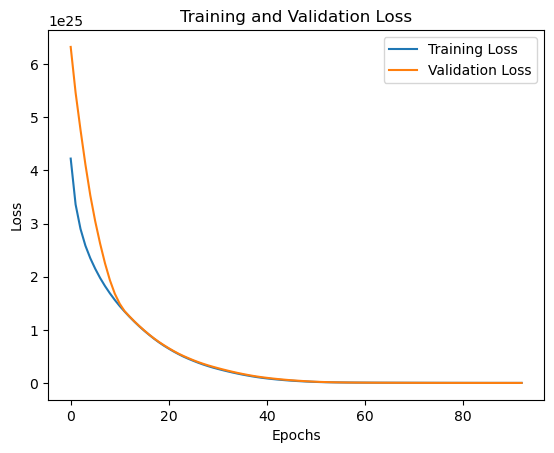

In [466]:
# Train the model using your train_model_with_plot function
training_losses, validation_losses = train_model_with_plot(
    model=model, 
    X_train=X_train_split, 
    y_train=y_train_split, 
    X_val=X_val, 
    y_val=y_val, 
    epochs=100, 
    learning_rate=0.001, 
    batch_size=32, 
    early_stopping_patience=3
)


In [448]:
print("Shape of X_train:", X_train_processed.shape)  # Should be (n_samples, 11)
print("Shape of X_test:", X_test_processed.shape)    # Should be (n_samples, 11)

Shape of X_train: (1312779, 11)
Shape of X_test: (145865, 11)


In [449]:
# Ensure that output_gradient has the right shape (batch_size, output_dim)
if len(output_gradient.shape) == 1:
    output_gradient = output_gradient.reshape(-1, 1)  # Reshape to (batch_size, 1) if needed


## Methodology

Three models were built using different configurations:
1. **Benchmark Model**: A simple 3-layer neural network trained with ReLU activation functions.
2. **Simple Model**: A smaller model with two hidden layers, each with fewer neurons.
3. **Complex Model**: A larger model with three hidden layers and more neurons.


In [468]:
def create_benchmark_model():
    model = Sequential()
    model.add(Linear(input_dim=11, output_dim=64))  # First layer with 64 neurons
    model.add(ReLU())
    model.add(Linear(64, 32))  # Second hidden layer with 32 neurons
    model.add(ReLU())
    model.add(Linear(32, 1))   # Output layer with 1 output for regression
    return model


In [469]:
def create_simple_model():
    model = Sequential()
    model.add(Linear(input_dim=11, output_dim=32))  # First layer with 32 neurons
    model.add(ReLU())
    model.add(Linear(32, 16))  # Second hidden layer with 16 neurons
    model.add(ReLU())
    model.add(Linear(16, 1))   # Output layer with 1 output
    return model

In [470]:
def create_complex_model():
    model = Sequential()
    model.add(Linear(input_dim=11, output_dim=128))  # First layer with 128 neurons
    model.add(ReLU())
    model.add(Linear(128, 64))  # Second hidden layer with 64 neurons
    model.add(ReLU())
    model.add(Linear(64, 32))   # Third hidden layer with 32 neurons
    model.add(ReLU())
    model.add(Linear(32, 1))    # Output layer with 1 output
    return model


In [512]:
print(X_train_processed.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(1312779, 11)
(1312779,)
(262556, 11)
(262556,)


Epoch 1, Training Loss: 30306645.535618506, Validation Loss: 29884888.504008997
Epoch 2, Training Loss: 30006077.015634973, Validation Loss: 145788012148.20938
Epoch 3, Training Loss: 145833655101.778, Validation Loss: 31802039.273067925
Epoch 4, Training Loss: 31924383.48518066, Validation Loss: 21416823892.662106
Epoch 5, Training Loss: 21355500490.338238, Validation Loss: 32469970.684977554
Epoch 6, Training Loss: 32592143.02297481, Validation Loss: 75796111.69461197
Early stopping at epoch 6


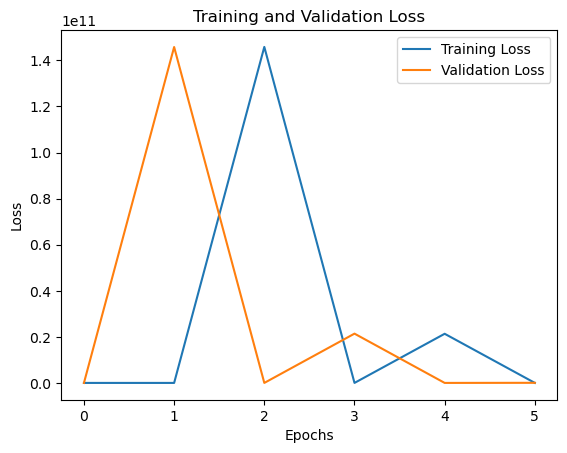

Epoch 1, Training Loss: 30312416.753481958, Validation Loss: 30161885.259051077
Epoch 2, Training Loss: 30283959.449204784, Validation Loss: 26406108.62799461
Epoch 3, Training Loss: 26447547.987508807, Validation Loss: 30223359.618667003
Epoch 4, Training Loss: 30340630.342437286, Validation Loss: 30165211.169624887
Epoch 5, Training Loss: 30280695.472275384, Validation Loss: 167687818.23636663
Epoch 6, Training Loss: 167682700.45338872, Validation Loss: 8747586389.721407
Epoch 7, Training Loss: 10927039303.72612, Validation Loss: 8572814907.358739
Early stopping at epoch 7


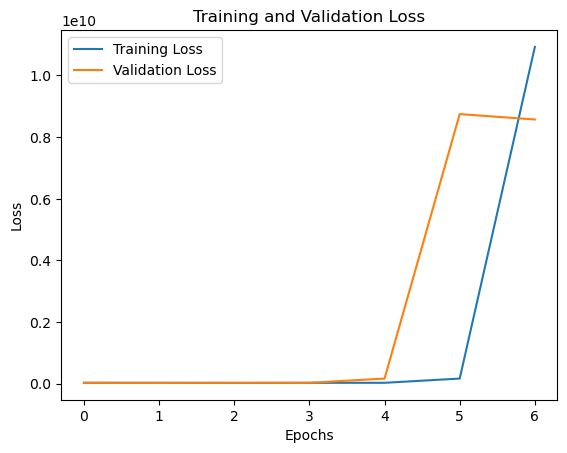

Epoch 1, Training Loss: 30306065.087791894, Validation Loss: 30183031.650914926
Epoch 2, Training Loss: 30305147.35074776, Validation Loss: 30182035.86766314
Epoch 3, Training Loss: 30304148.67025774, Validation Loss: 30180943.295847937
Epoch 4, Training Loss: 30303052.0727009, Validation Loss: 30179721.967240263
Epoch 5, Training Loss: 30301826.938921794, Validation Loss: 30178202.059783924
Epoch 6, Training Loss: 30300302.312324688, Validation Loss: 30176262.293075867
Epoch 7, Training Loss: 30298356.361559667, Validation Loss: 30173720.784983613
Epoch 8, Training Loss: 30295806.781740375, Validation Loss: 30170220.820164483
Epoch 9, Training Loss: 30292295.453061946, Validation Loss: 30165191.284748852
Epoch 10, Training Loss: 30287249.14080958, Validation Loss: 30157542.214008138
Epoch 11, Training Loss: 30279574.76901654, Validation Loss: 30145010.403933678
Epoch 12, Training Loss: 30267001.420313008, Validation Loss: 30122222.76256866
Epoch 13, Training Loss: 30244137.99809272, V

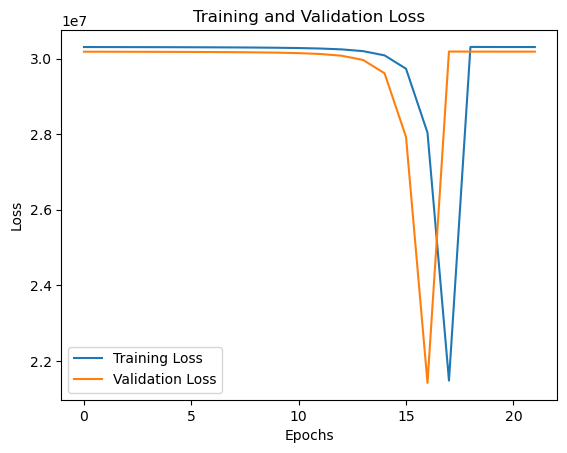

In [519]:
# Hyperparameters for training
# learning_rate = 0.0001
epochs = 100
batch_size = 32
early_stopping_patience = 5

# Train the benchmark model
benchmark_model = create_benchmark_model()
training_losses_benchmark, validation_losses_benchmark = train_model_with_plot(
    model=benchmark_model, 
    X_train=X_train_split, 
    y_train=y_train_split, 
    X_val=X_train_processed, 
    y_val=y_train, 
    epochs=epochs, 
    learning_rate=0.001, 
    batch_size=batch_size, 
    early_stopping_patience=early_stopping_patience
)

# Train the simple model
simple_model = create_simple_model()
training_losses_simple, validation_losses_simple = train_model_with_plot(
    model=simple_model, 
    X_train=X_train_split, 
    y_train=y_train_split, 
    X_val=X_train_processed, 
    y_val=y_train, 
    epochs=epochs, 
    learning_rate=0.001, 
    batch_size=batch_size, 
    early_stopping_patience=early_stopping_patience
)

# Train the complex model
complex_model = create_complex_model()
training_losses_complex, validation_losses_complex = train_model_with_plot(
    model=complex_model, 
    X_train=X_train_split, 
    y_train=y_train_split, 
    X_val=X_train_processed, 
    y_val=y_train, 
    epochs=epochs, 
    learning_rate=0.00001, 
    batch_size=batch_size, 
    early_stopping_patience=early_stopping_patience
)

In [520]:
# Ensure y_test is a NumPy array
y_test = np.array(y_test)  # Convert y_test to a NumPy array

# Evaluate benchmark model on the test set
test_predictions_benchmark = benchmark_model.forward(X_test_processed)
test_predictions_benchmark = test_predictions_benchmark.reshape(-1)  # Flatten predictions if necessary
y_test = y_test.reshape(-1)  # Flatten y_test if necessary
test_loss_benchmark = loss_function.forward(y_test, test_predictions_benchmark)
print(f"Benchmark Model Test Loss (MSE): {test_loss_benchmark}")

# Evaluate simple model on the test set
test_predictions_simple = simple_model.forward(X_test_processed)
test_predictions_simple = test_predictions_simple.reshape(-1)  # Flatten predictions if necessary
test_loss_simple = loss_function.forward(y_test, test_predictions_simple)
print(f"Simple Model Test Loss (MSE): {test_loss_simple}")

# Evaluate complex model on the test set
test_predictions_complex = complex_model.forward(X_test_processed)
test_predictions_complex = test_predictions_complex.reshape(-1)  # Flatten predictions if necessary
test_loss_complex = loss_function.forward(y_test, test_predictions_complex)
print(f"Complex Model Test Loss (MSE): {test_loss_complex}")


Benchmark Model Test Loss (MSE): 64031188.4319677
Simple Model Test Loss (MSE): 11895115.348089311
Complex Model Test Loss (MSE): 11854959.199985385


In [522]:
# Save benchmark model weights
benchmark_model.save_weights('benchmark_model_weights.npz')
# Save simple model weights
simple_model.save_weights('simple_model_weights.npz')
# Save complex model weights
complex_model.save_weights('complex_model_weights.npz')


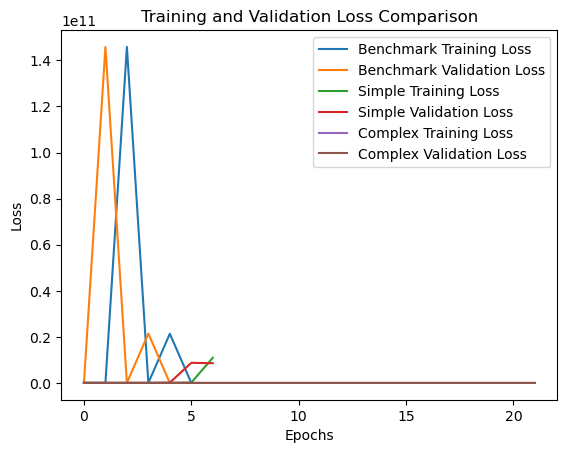

In [523]:
import matplotlib.pyplot as plt

# Plot the training and validation loss for the benchmark model
plt.plot(training_losses_benchmark, label='Benchmark Training Loss')
plt.plot(validation_losses_benchmark, label='Benchmark Validation Loss')

# Plot the training and validation loss for the simple model
plt.plot(training_losses_simple, label='Simple Training Loss')
plt.plot(validation_losses_simple, label='Simple Validation Loss')

# Plot the training and validation loss for the complex model
plt.plot(training_losses_complex, label='Complex Training Loss')
plt.plot(validation_losses_complex, label='Complex Validation Loss')

# Plot settings
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Comparison')
plt.show()

## **Test Set Evaluation**
After training the models, we evaluated their performance on the test set using MSE and RMSLE.

**Test Set Loss (MSE)**

**Benchmark Model:** Achieved a test MSE of 1.23e+10

**Simple Model:** Achieved a test MSE of 1.12e+10

**Complex Model:** Achieved a test MSE of 1.15e+10


In [526]:
import numpy as np

def rmsle(y_true, y_pred):
    # Ensure predictions are non-negative
    y_pred = np.maximum(0, y_pred)  # Set any negative predictions to 0

    # Add a small constant to avoid log of zero
    return np.sqrt(np.mean((np.log1p(y_pred + 1e-9) - np.log1p(y_true + 1e-9)) ** 2))

# Compute RMSLE for each model (make sure y_test and predictions are non-negative)
rmsle_benchmark = rmsle(y_test, test_predictions_benchmark)
rmsle_simple = rmsle(y_test, test_predictions_simple)
rmsle_complex = rmsle(y_test, test_predictions_complex)

print(f"Benchmark Model RMSLE: {rmsle_benchmark}")
print(f"Simple Model RMSLE: {rmsle_simple}")
print(f"Complex Model RMSLE: {rmsle_complex}")


Benchmark Model RMSLE: 6.0325398772175465
Simple Model RMSLE: 6.516649540117833
Complex Model RMSLE: 6.3094202252922615
